# Tensorflow Input data handling
이름에서부터 알 수 있듯이 Data science에서 Data를 잘 다루는 것은 기본 중의 기본이다. 이는 Tensorflow를 학습할 때에도 마찬가지이다. 좋은 알고리즘 또는 네트워크를 구현할 수 있는 것도 중요하겠지만, 실제 연구 또는 응용을 위해서는 데이터를 잘 가공하고, 효율적으로 데이터를 처리할 수 있는 기법을 잘 알고 있는 것이 중요하다. 이러한 능력을 배양하기 위하여 이번 실습에서는 Tensorflow의 Data 관련한 API들에 관하여 소개할 것이다. 관련 API가 여러 가지가 있지만 실습에서는 아래 API를 다룰 것이다.
- Keras data API
- Keras preprocess API
- Tensorflow data API

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

## Keras data API
먼저 Keras에서 제공하는 간단한 data API들을 소개한다.

### Keras datasets
많이 사용되는 작은 데이터셋들을 사용하기 편하게 아래와 같은 모듈 형태로 제공하고, load_data()를 통해 numpy array로 받아올 수 있다. 아래의 데이터셋들을 사용할 수 있다.

* boston_housing module: Boston housing price regression dataset.
* cifar10 module: CIFAR10 small images classification dataset.
* cifar100 module: CIFAR100 small images classification dataset.
* fashion_mnist module: Fashion-MNIST dataset.
* imdb module: IMDB sentiment classification dataset.
* mnist module: MNIST handwritten digits dataset.
* reuters module: Reuters topic classification dataset.

In [2]:
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train| set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

170498071/170498071 [==============================] - 31s 0us/step


### Data preprocessing/augmentation using Keras layers
**Old Tensorflow에서는 사용이 불가할 수 있음**<br><br>
최신 버전의 keras에서는 간단한 data preprocessing/augmentation을 할 수 있도록 layer를 생성하는 기능이 추가되었다. 

- `tf.keras.layers.experimental.preprocessing`: Rescaling(변수 스케일링), RandomFlip(상하/좌우 반전), RandomRotation(회전) 등의 data augmentation을 적용 가능하다. 더욱 자세한 내용은 아래 링크를 참조하자.<br> https://keras.io/guides/preprocessing_layers/#:~:text=Keras%20preprocessing%20layers%20The%20Keras%20preprocessing%20layers%20API,and%20exported%20as%20part%20of%20a%20Keras%20SavedModel.

실습을 통해 활용해 보도록 하자. 아래 작업을 해볼 것이다.<br>
- 0 ~ 255사이의 정수로 들어온 데이터를 0~1사이의 실수 값으로 변환 (Rescaling)
- 상하/좌우 랜덤 반전 (RandomFlip)
- 회전(2pi * 20%) (RandomRotation)

In [13]:
data_augmentation = tf.keras.Sequential([
    ###### 아래 빈칸. 실습하면서 완성 #####
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255.0),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ###### 빈칸 끝 #####
])

다른 Layer들과 마찬가지로 Model에 layer를 추가해주면 네트워크가 시작하기 전에 전처리 등을 수행하게 된다.

In [14]:
model = tf.keras.models.Sequential([  
  data_augmentation,    
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax') 
])

또는 모델에는 포함시키지 않고 아래와 같은 방식으로 Data가 가공되도록 구성할 수도 있다.

In [6]:
#Data preprocessing/augmentation for training images
x_train = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_train)
x_train = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")(x_train)
x_train = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)(x_train)

#Data preprocessing/augmentation for validation/test images
x_valid = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_valid)
x_test = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_valid)

KeyboardInterrupt: 

## Keras preprocess API: ImageDataGenerator
keras.preprocess의 여러 method들을 이용하여 Data preprocessing/augmentation을 하는 것도 가능하다. 이번 실습에서는 ImageDataGenerator와 관련된 method들을 소개한다.<br>
ImageDataGenerator class를 이용하면 여러가지 augementation들을 설정할 수 있다. 

- `tf.keras.preprocessing.image.ImageDataGenerator`: rescale, horizontal_flip, vertical_flip, rotation_range 등의 Argument를 입력하여 자주 사용되는 Data augmentation들을 손쉽게 추가할 수 있다. 상세한 내용은 다음 링크를 참조하자:
https://keras.io/api/preprocessing/image/#imagedatagenerator-class
- 위와 동일하게 rescale, horizontal/vertical flip, rotation 등을 설정해보자.

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  ###### 아래 빈칸. 실습하면서 완성 #####
  rescale = 1/255.0,
  vertical_flip = True,
  horizontal_flip = True,
  rotation_range = 72

    ###### 빈칸 끝 #####
)


`ImageDataGenerator.flow()` method를 활용하면 batch 단위로 image와 label을 numpy array 형태로 generate해 준다. Default batch size는 32이며, ImageDataGenerator 생성시에 batch_size를 입력해 줄 수 있다.

In [9]:
batch_x, batch_y = next(datagen.flow(x_train, y_train, batch_size=32, shuffle=True))
print(batch_x.shape)
print(batch_y.shape)

(32, 32, 32, 3)
(32, 1)


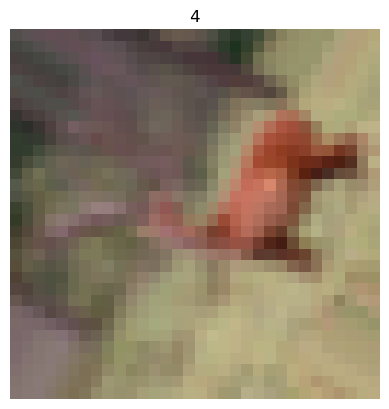

In [10]:
# Visualize single data
def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label[0])
    plt.axis('off')
    
show(batch_x[0], batch_y[0])

In [15]:
model = tf.keras.models.Sequential([   
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(32,32,3)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax') 
])

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])

트레이닝을 위해서는 아래와 같이 `model.fit`의 인자로 `ImageDataGenerator.flow()`를 넣어주면 된다.

In [17]:
model.fit(datagen.flow(x_train, y_train, batch_size=32, shuffle=True),
          steps_per_epoch=len(x_train)/32, 
          epochs=10)

NameError: name 'datagen' is not defined

# Tensorflow data API
위에서 소개한 Keras의 data API가 사용하기 간편하기는 하지만, 세부적인 조정을 하기에는 부족함이 있다. Tensorflow data API를 사용하면 조금 더 세부적인 데이터 가공이 가능할 뿐만 아니라, data pipeline을 구성에 있어서도 효율적이다. 이는 대용량 데이터를 이용한 트레이닝시에 많은 차이를 가져올 수 있다.<br>
<br>
이번 실습에서는 `tf.data.Datasets` class를 활용하여 데이터를 다루는 방법을 소개할 것이다.<br> 
먼저, data API에서 기본적으로 제공하는 Dataset들을 활용하기 위하여 아래 `tensorflow_datasets` 모듈을 import하자. `keras.datasets`보다 다양한 Dataset을 사용할 수 있다.<br>
<br>
*`tensorflow_datasets`은 `tf.data.Datasets` 클래스와는 구분하도록 하자. `tensorflow_datasets` 모듈을 통해 로드하는 것이 `tf.data.Datasets` 오브젝트들이다.*

In [14]:
# !pip install tensorflow_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 33.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=0c04cc1b811e23ee31fe84f64716e5d9eb2aeac6a67d255559ec9a2685237690
  Stored in directory: /Users/liontea/Library/Caches/pip/wheels/54/4e/28/3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise


In [18]:
import tensorflow_datasets as tfds

위 모듈로부터 cifar10 데이터셋을 로드하자.

In [19]:
# Load  cifar10 dataset
(dataset_train, dataset_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# The dataset is split int train/test dataset
# Let's split the trainset into train/validation dataset
# Set train/validation split as 0.8:0.2
train_size = int(ds_info.splits['train'].num_examples * 0.8)
val_size = ds_info.splits['train'].num_examples - train_size

# Use take method to retrieve (train_size) data as New training data
ds_train = dataset_train.take(train_size)

# Use skip method to retrieve remaining data as validation data
ds_val = dataset_train.skip(train_size)

tf.data.Dataset을 이용할 때에는 Dataset.map()을 활용하여 데이터 가공을 수행할 수 있다. 아래에서 데이터를 1/255로 나누어주는 작업을 수행해 보자.

In [20]:
def normalize_img(image, label):
###### 아래 빈칸. 실습하면서 완성 #####
    return tf.cast(image, tf.float32) / 255.0, label
    
###### 빈칸 끝 #####

ds_train = ds_train.map(
    normalize_img,
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

#Not available in tf 2.1. deterministic=False #In case multithread is used, the order of data could be mixed

또한 꼭 Tensorflow 라이브러리에서 제공하는 함수가 아니라도, tf.py_function을 이용하여 아래와 같이 Dataset.map을 적용할 수 있다. 아래에서는 scipy.ndimage의 rotate를 활용하여 임의의 회전 변환을 하거나 상하반전변환을 하는 것을 보여준다.

In [21]:
import scipy.ndimage as ndimage

def random_rotate(image):
    ###### 아래 빈칸. 실습하면서 완성 #####
    image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
    
    ###### 빈칸 끝 #####    
    return image

def tf_random_rotate(image, label):
    im_shape = image.shape
    [image] = tf.py_function(random_rotate, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label

ds_train = ds_train.map(
    tf_random_rotate, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [22]:
def vertical_flip(image):
    image = np.flipud(image)    
    return image

def tf_vertical_flip(image, label):
    im_shape = image.shape
    [image] = tf.py_function(vertical_flip, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label

ds_train = ds_train.map(
    tf_vertical_flip, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
    #Not available in tf 2.1.deterministic=False
)

2022-09-07 23:52:27.145816: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


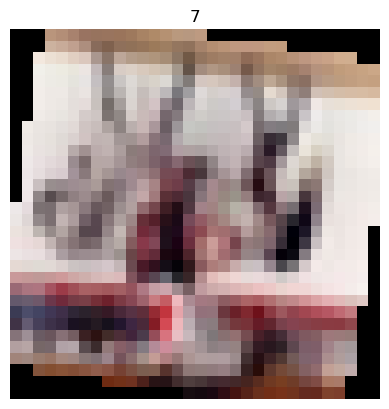

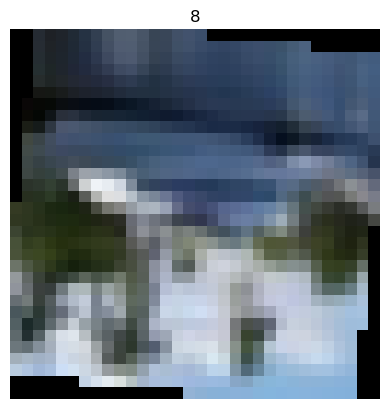

In [23]:
def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy())
    plt.axis('off')
    
for image, label in ds_train.take(2):
    show(image, label)

아래와 같이 Cache, Batch, Prefetch, Shuffle 등 Dataset의 Method들을 적용해 주자. 데이터의 사이즈가 큰 경우 상황에 맞게 적절한 Method를 활용함으로써 트레이닝 속도를 향상시킬 수 있다. 상세한 활용법은 아래 페이지를 참고하자.


https://www.tensorflow.org/guide/data_performance

In [24]:
#ds_train = ds_train.cache() #You may cache the data, if it fits in memory

#If possible, set buffer size same as the full number of data
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples) 

# Set the batch size
ds_train = ds_train.batch(32)

# Prefetch data for performance
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

모델 트레이닝 시에는 아래와 같이 Dataset을 model.fit의 인자로 넣어준다. 이전 방법들과는 다르게 Image, label을 별도로 넣어주지 않아도 된다.

In [25]:
model.fit(ds_train, epochs=1)

2022-09-07 23:52:31.636667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-07 23:52:41.674133: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 8240 of 50000
2022-09-07 23:52:51.674990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 16840 of 50000
2022-09-07 23:53:01.673468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 25467 of 50000
2022-09-07 23:53:11.670121: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 34163 of 50000
2022-09-07 23:53:18.381571: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents o

1250/1250 [==============================] - 59s 9ms/step - loss: 1.5509 - accuracy: 0.4446


### File로부터 Tensorflow Dataset 만들기

먼저 적당한 Data를 다운로드받고, 경로를 저장하자.

In [26]:
import pathlib
flowers_root  = tf.keras.utils.get_file(
    "flower_photos",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    untar=True)

# The path of data folder
flowers_root = pathlib.Path(flowers_root) 

228813984/228813984 [==============================] - 5s 0us/step


파일로부터 Dataset을 만들기 위해서 폴더 구조는 아래와 같이 구성되어 있어야 한다. 즉, 각 클래스별 폴더 아래에 이미지가 모여 있는 형태가 되어야 한다.

main_directory/ <br>
...class_a/ <br>
......a_image_1.jpg <br>
......a_image_2.jpg <br>
...class_b/ <br>
......b_image_1.jpg <br>
......b_image_2.jpg <br>
<br>
위와 같이 폴더 구조를 구성한 후 `keras.preprocessing.image_dataset_from_directory` method를 이용하면 아래와 같이 tf.data.Dataset 클래스로 구성해 준다. (**Old tensorflow version에서는 실행 불가능할 수 있음**)


In [27]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  flowers_root,
  validation_split=0.2,
  subset="training",
  seed=123, # For shuffling, shuffle is defaulted to True
  image_size=(180, 180)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  flowers_root,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180)
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


이후의 과정은 앞에서 설명한 tf.data.Dataset의 여러 method를 활용하여 진행하면 된다. keras.preprocessing을 사용하지 않고 직접 파일을 로드하여 tf.data.Dataset을 구성하고 싶다면 아래와 같은 방식도 가능하다. 지정된 경로의 모든 파일이 하나의 tf.data.Dataset이 되고 위에서 설명한 방법을 이용하여 training/validation/test split, preprocessing 등을 해볼 수 있다.

In [28]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [29]:
import os

def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)    

    label_dict = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
    label = parts[-2] == label_dict # Get label from folder name

    image = tf.io.read_file(filename) 
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [180, 180])
    return image, label

images_ds = list_ds.map(parse_image)

이 외에도 Data preprocessing/augmentation을 위한  여러 가지 방법론들이 있으나, 본 실습에서 모두 다루기에는 분량이 너무 많으므로 각자 사용하고자 하는 데이터 및 처리 방향에 맞추어 적절한 방법론을 찾아 공부하도록 하자.
- Custom data generator: 사용자 입맛에 맞추어 data generator를 만들 수 있다.  `keras.utils.Sequence`를 활용한 Data generator 생성은 Dcoumentation을 참고하자. https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence
- TFRecord: Tensorflow에서 제공하는 데이터 저장 포맷으로, 보다 효율적인 데이터 로드를 가능하게 해준다. 이를 위한 데이터 저장 포맷, Method 들이 별도로 존재하므로 필요하다면 관련 Documentation을 참고하자. https://www.tensorflow.org/tutorials/load_data/tfrecord

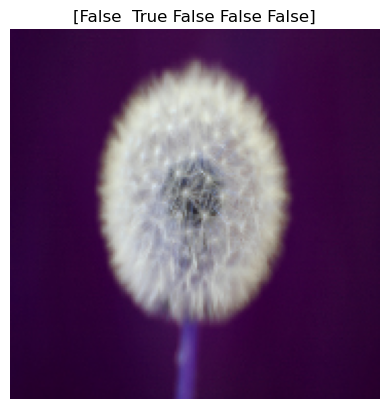

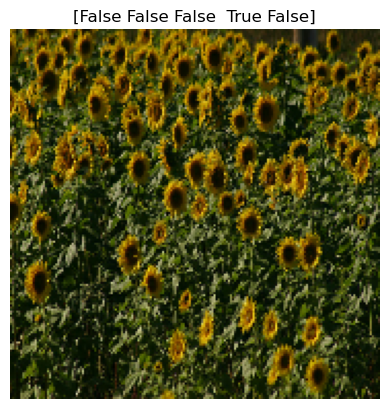

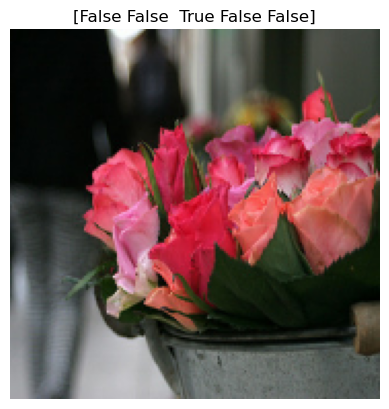

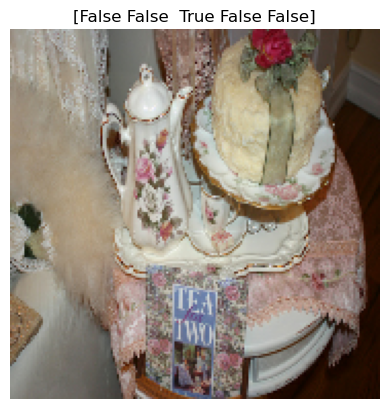

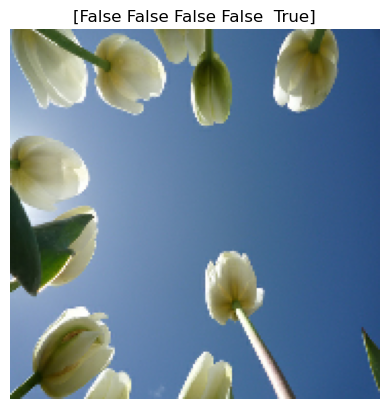

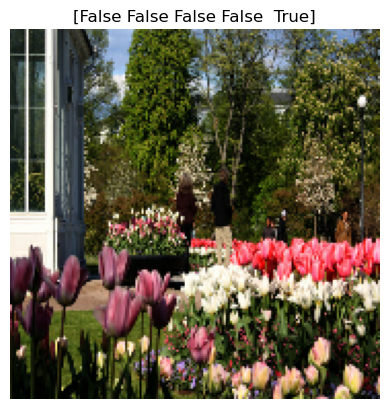

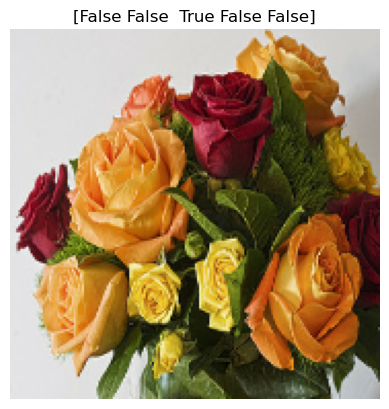

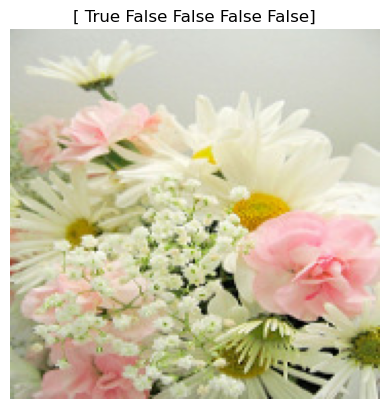

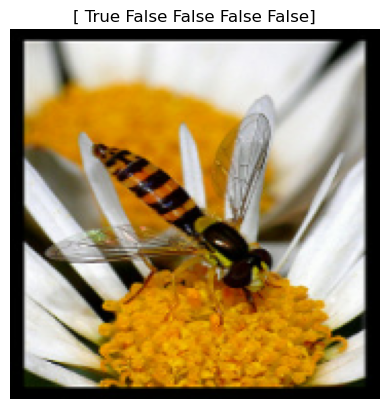

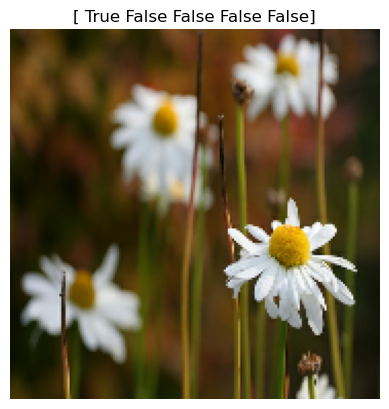

In [33]:
for image, label in images_ds.take(10):
    show(image, label)